# Necassary Libraries importing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Important CSV files importing 

In [21]:
cleaned_calls=pd.read_csv(r"C:\Users\Md. Rehaan\Desktop\hackathon\calls.csv")

In [22]:
cleaned_calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [6]:
cleaned_calls_reason=pd.read_csv(r"C:\Users\Md. Rehaan\Desktop\hackathon\cleaned csv files\Cleaned_calls_reason.csv")

In [25]:
cleaned_calls_reason.head()

,Unnamed: 0,call_id,primary_call_reason
0,0,4667960400,Voluntary_Cancel
1,1,1122072124,Booking
2,2,6834291559,Irrops
3,3,2266439882,Upgrade
4,4,1211603231,Seating


In [8]:
cleaned_customer_data=pd.read_csv(r"C:\Users\Md. Rehaan\Desktop\hackathon\cleaned csv files\cleaned_customer_data.csv")

In [9]:
cleaned_customer_data.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4
1,8186702651,Tammy Walters,0
2,2416856629,Jeffery Dixon,0
3,1154544516,David Wilkins,2
4,5214456437,Elizabeth Daniels,0


In [10]:
cleaned_sentiment=pd.read_csv(r"C:\Users\Md. Rehaan\Desktop\hackathon\cleaned csv files\Cleaned_Sentiment.csv")

In [11]:
cleaned_sentiment.head()

,Unnamed: 0,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,0,4667960400,963118,neutral,angry,-0.04,0.39
1,1,1122072124,519057,calm,neutral,0.02,0.35
2,2,6834291559,158319,neutral,polite,0.13,0.32
3,3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,4,1211603231,721730,neutral,polite,0.05,0.35


# Data Analysis

## Covering 1st Deliverables

### 1. Calculate Average Handle Time (AHT) for each primary call reason

In [57]:

cleaned_calls['agent_assigned_datetime'] = pd.to_datetime(cleaned_calls['agent_assigned_datetime'])
cleaned_calls['call_end_datetime'] = pd.to_datetime(cleaned_calls['call_end_datetime'])
merged_data = pd.merge(cleaned_calls, cleaned_calls_reason, on='call_id')
merged_data['handle_time_seconds'] = (merged_data['call_end_datetime'] - merged_data['agent_assigned_datetime']).dt.total_seconds()
aht_per_reason = merged_data.groupby('primary_call_reason')['handle_time_seconds'].mean().reset_index()
aht_per_reason.columns = ['primary_call_reason', 'avg_handle_time_seconds']
aht_per_reason['avg_handle_time_seconds'] = aht_per_reason['avg_handle_time_seconds'].round(2)
df_filtered = aht_per_reason[aht_per_reason['primary_call_reason'] != 'Etc']
aht_per_reason=df_filtered
# Considering Top 5 Primary call reasons
top_5_aht=aht_per_reason.sort_values('avg_handle_time_seconds',ascending=False).head(5)
top_5_aht

,primary_call_reason,avg_handle_time_seconds
3,Checkout,1016.85
9,Mileage_Plus,995.57
11,Post_Flight,932.90
4,Communications,826.72
8,Irrops,785.12


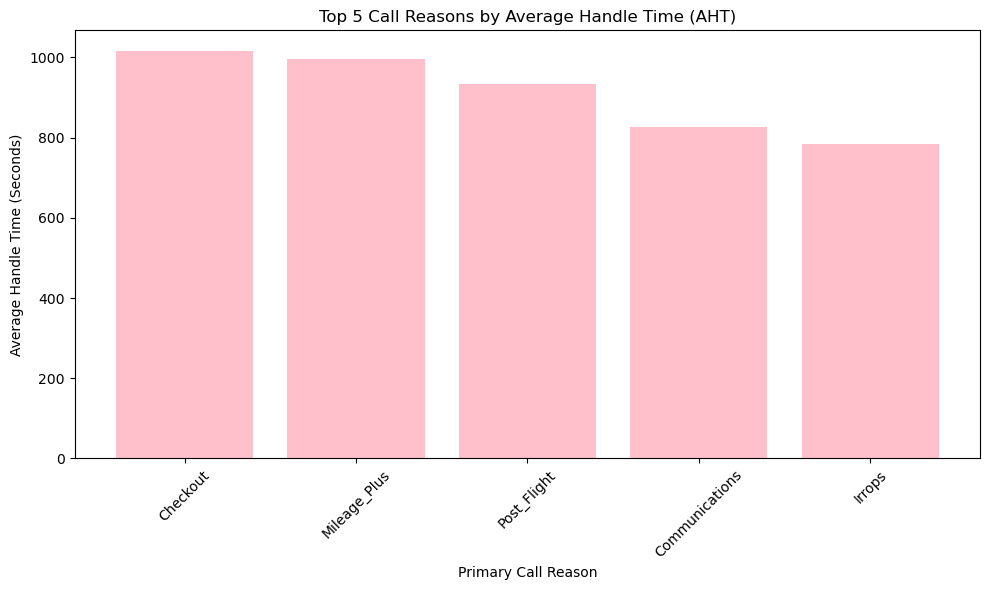

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_aht['primary_call_reason'], top_5_aht['avg_handle_time_seconds'], color='pink')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (Seconds)')
plt.title('Top 5 Call Reasons by Average Handle Time (AHT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Calculate Average Speed to Answer (AST) for each primary call reason

In [28]:
cleaned_calls['call_start_datetime'] = pd.to_datetime(cleaned_calls['call_start_datetime'], errors='coerce')
cleaned_calls['agent_assigned_datetime'] = pd.to_datetime(cleaned_calls['agent_assigned_datetime'], errors='coerce')
merged_data = pd.merge(cleaned_calls, cleaned_calls_reason, on='call_id')
merged_data['speed_to_answer_seconds'] = (merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']).dt.total_seconds()
ast_per_reason = merged_data.groupby('primary_call_reason')['speed_to_answer_seconds'].mean().reset_index()
ast_per_reason.columns = ['primary_call_reason', 'speed_to_answer_seconds']
ast_per_reason=ast_per_reason.sort_values('speed_to_answer_seconds',ascending=False).round(2)
# Considering Top 5 primary call reasons
top_5_ast=ast_per_reason.head(5).round(2)
top_5_ast

,primary_call_reason,speed_to_answer_seconds
3,Checkout,724.70
16,Traveler_Updates,690.03
17,Unaccompanied_Minor,688.27
15,Seating,570.82
11,Post_Flight,569.43


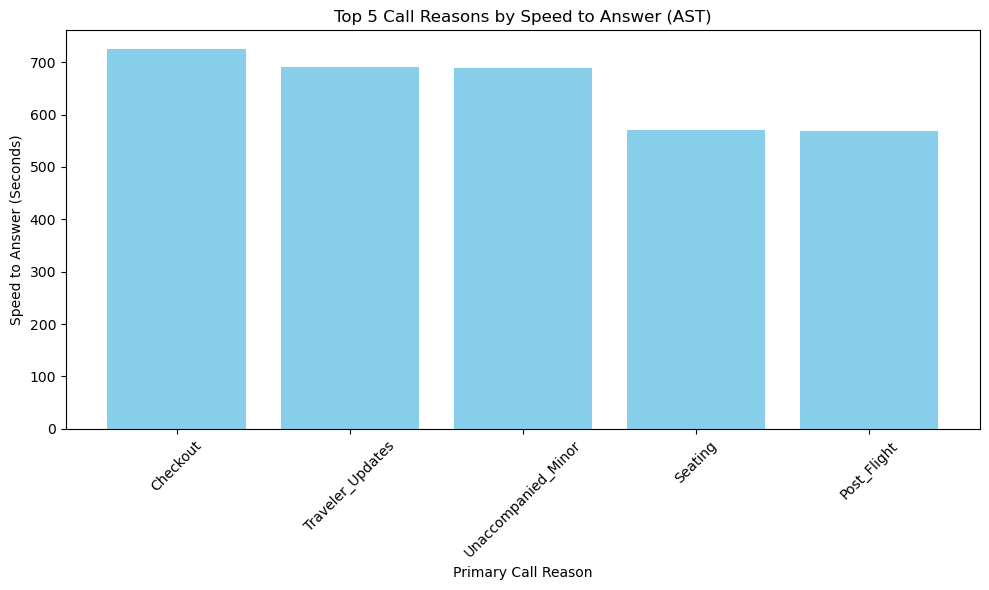

In [29]:

plt.figure(figsize=(10, 6))
plt.bar(top_5_ast['primary_call_reason'], top_5_ast['speed_to_answer_seconds'], color='skyblue')
plt.xlabel('Primary Call Reason')
plt.ylabel('Speed to Answer (Seconds)')
plt.title('Top 5 Call Reasons by Speed to Answer (AST)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. Longest AHT and AST Call Reasons

In [30]:

cleaned_calls['call_start_datetime'] = pd.to_datetime(cleaned_calls['call_start_datetime'], errors='coerce')
cleaned_calls['agent_assigned_datetime'] = pd.to_datetime(cleaned_calls['agent_assigned_datetime'], errors='coerce')
cleaned_calls['call_end_datetime'] = pd.to_datetime(cleaned_calls['call_end_datetime'], errors='coerce')

merged_data = pd.merge(cleaned_calls, cleaned_calls_reason, on='call_id')

merged_data['handle_time_seconds'] = (merged_data['call_end_datetime'] - merged_data['agent_assigned_datetime']).dt.total_seconds()
merged_data['speed_to_answer_seconds'] = (merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']).dt.total_seconds()

aht_ast_per_reason = merged_data.groupby('primary_call_reason').agg({
    'handle_time_seconds': 'mean',
    'speed_to_answer_seconds': 'mean'
}).reset_index()

aht_ast_per_reason_sorted = aht_ast_per_reason.sort_values(by=['handle_time_seconds', 'speed_to_answer_seconds'], ascending=False)
aht_ast_per_reason_sorted = aht_ast_per_reason_sorted.round(2)

aht_ast_per_reason_sorted.head(5)


,primary_call_reason,handle_time_seconds,speed_to_answer_seconds
3,Checkout,1016.85,724.70
9,Mileage_Plus,995.57,361.02
7,Etc,962.90,544.29
11,Post_Flight,932.90,569.43
4,Communications,826.72,239.97


### 4. Agent Performance in AHT and AST


In [60]:

cleaned_calls['call_start_datetime'] = pd.to_datetime(cleaned_calls['call_start_datetime'], errors='coerce')
cleaned_calls['agent_assigned_datetime'] = pd.to_datetime(cleaned_calls['agent_assigned_datetime'], errors='coerce')
cleaned_calls['call_end_datetime'] = pd.to_datetime(cleaned_calls['call_end_datetime'], errors='coerce')


merged_data = pd.merge(cleaned_calls, cleaned_calls_reason, on='call_id')
merged_data['handle_time_seconds'] = (merged_data['call_end_datetime'] - merged_data['agent_assigned_datetime']).dt.total_seconds()
merged_data['speed_to_answer_seconds'] = (merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']).dt.total_seconds()


aht_ast_per_agent = merged_data.groupby('agent_id').agg({
    'handle_time_seconds': 'mean',
    'speed_to_answer_seconds': 'mean'
}).reset_index()

aht_ast_per_agent_sorted = aht_ast_per_agent.sort_values(by='handle_time_seconds', ascending=True).round(2)
aht_ast_per_agent_sorted.head(5)


,agent_id,handle_time_seconds,speed_to_answer_seconds
184,547592,180.00,600.00
210,616988,285.00,255.00
48,229129,352.50,360.00
238,676262,390.00,450.00
299,814757,427.83,412.17


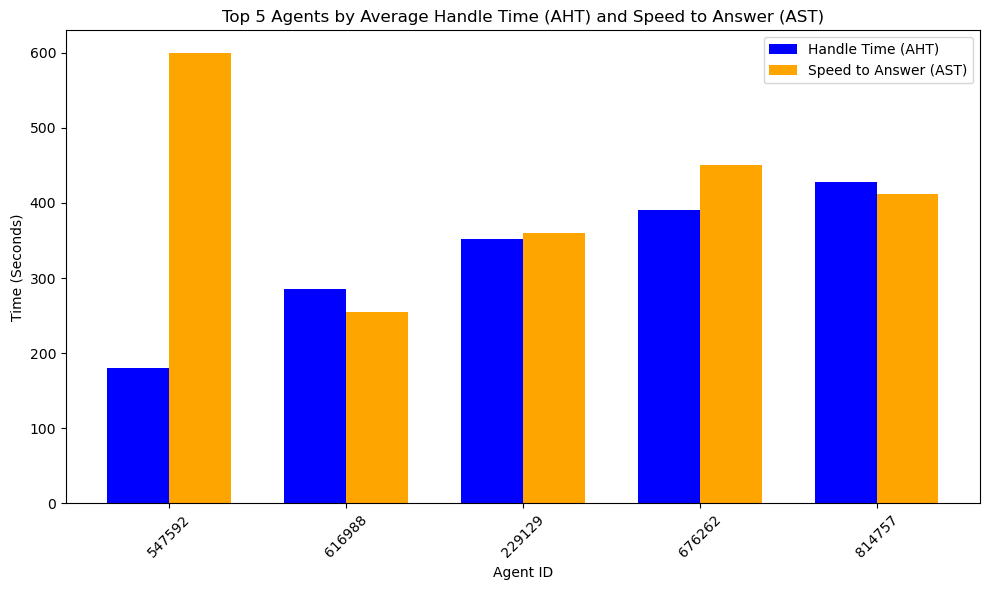

In [61]:
top_5_agents = aht_ast_per_agent_sorted.head(5)
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(top_5_agents))
plt.bar(index, top_5_agents['handle_time_seconds'], bar_width, label='Handle Time (AHT)', color='blue')
plt.bar([i + bar_width for i in index], top_5_agents['speed_to_answer_seconds'], bar_width, label='Speed to Answer (AST)', color='orange')

plt.xlabel('Agent ID')
plt.ylabel('Time (Seconds)')
plt.title('Top 5 Agents by Average Handle Time (AHT) and Speed to Answer (AST)')
plt.xticks([i + bar_width / 2 for i in index], top_5_agents['agent_id'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### 5. Sentiment Analysis and AHT

In [33]:

merged_sentiment_data = pd.merge(merged_data, cleaned_sentiment, on='call_id')
sentiment_aht_reason = merged_sentiment_data.groupby(['agent_tone', 'customer_tone', 'primary_call_reason'])['handle_time_seconds'].mean().reset_index()
sentiment_aht_reason_sorted = sentiment_aht_reason.sort_values(by='handle_time_seconds', ascending=False).reset_index(drop=True)
sentiment_aht_reason_sorted.head(5)


,agent_tone,customer_tone,primary_call_reason,handle_time_seconds
0,frustrated,calm,Disability,1860.0
1,angry,polite,Etc,1800.0
2,frustrated,angry,Unaccompanied_Minor,1530.0
3,frustrated,calm,Schedule_Change,1500.0
4,angry,frustrated,Etc,1360.0


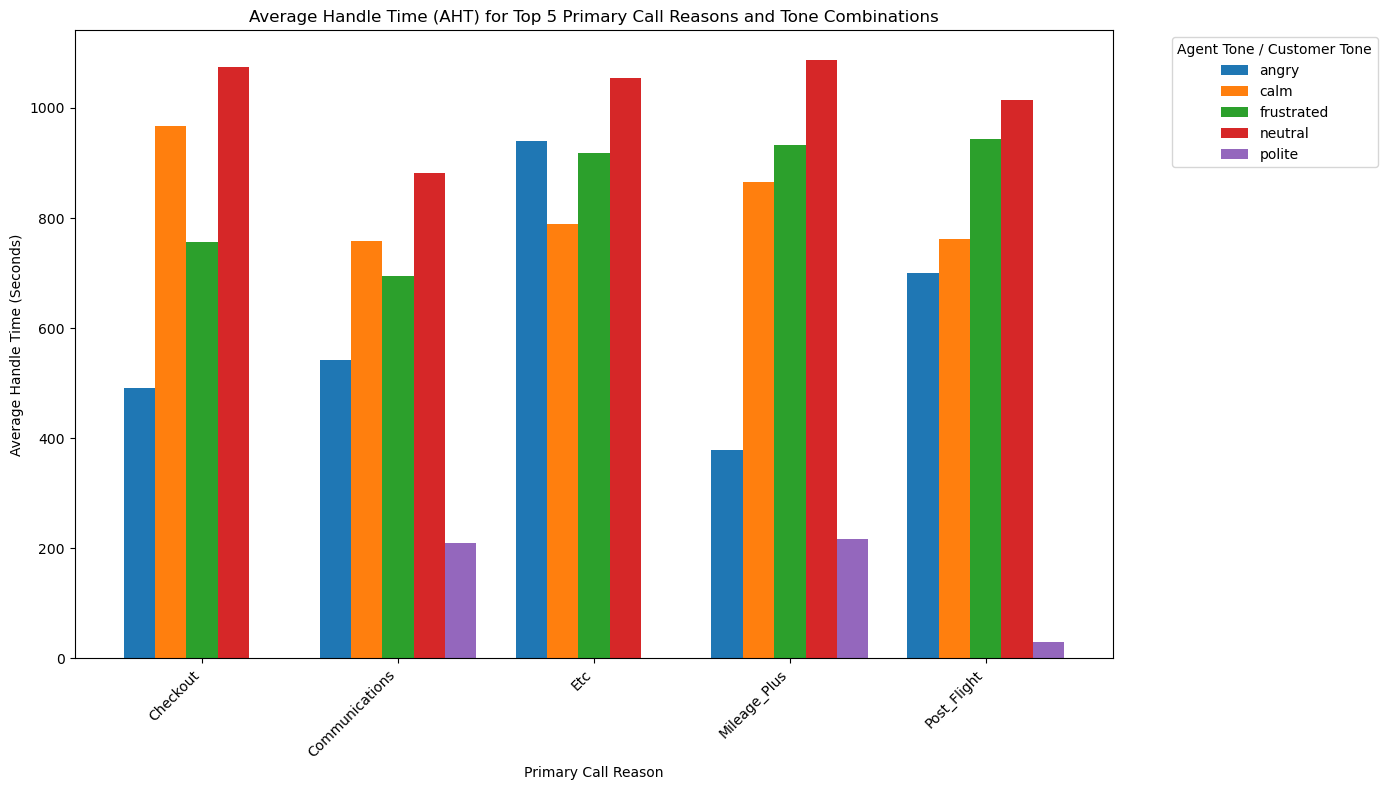

In [35]:

top_5_reasons = sentiment_aht_reason_sorted.groupby('primary_call_reason')['handle_time_seconds'].mean().nlargest(5).index
filtered_data = sentiment_aht_reason_sorted[sentiment_aht_reason_sorted['primary_call_reason'].isin(top_5_reasons)]
pivot_data = filtered_data.pivot_table(values='handle_time_seconds', index='primary_call_reason', columns='agent_tone').fillna(0)


pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Average Handle Time (AHT) for Top 5 Primary Call Reasons and Tone Combinations')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Agent Tone / Customer Tone', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


### 6. Percentage Difference Between AHT for Most Frequent and Least Frequent Call Reasons

In [62]:
call_reason_stats = merged_data.groupby('primary_call_reason').agg({
    'call_id': 'count',  # Count the number of occurrences
    'handle_time_seconds': 'mean'  # Calculate the average handle time (AHT)
}).reset_index()

call_reason_stats.columns = ['primary_call_reason', 'call_count', 'avg_handle_time_seconds']
most_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmax()]
least_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmin()]


aht_most_frequent = most_frequent_reason['avg_handle_time_seconds']
aht_least_frequent = least_frequent_reason['avg_handle_time_seconds']
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_least_frequent) * 100


print(f"Most Frequent Call Reason: {most_frequent_reason['primary_call_reason']} (AHT: {aht_most_frequent:.2f} seconds)")
print(f"Least Frequent Call Reason: {least_frequent_reason['primary_call_reason']} (AHT: {aht_least_frequent:.2f} seconds)")
print(f"Percentage Difference: {percentage_difference:.2f}%")


Most Frequent Call Reason: Irrops (AHT: 785.12 seconds)
Least Frequent Call Reason: Unaccompanied_Minor (AHT: 519.23 seconds)
Percentage Difference: 51.21%


## Covering 2nd Deliverables

### 1. Identifying Recurring Call Reasons that Could be Self-Solved

In [63]:

self_service_reasons = ['Booking', 'Check_In', 'Baggage', 'Upgrade', 'Seating', 'Checkout']
escalated_calls = merged_data[merged_data['primary_call_reason'].isin(self_service_reasons)]
escalated_count = escalated_calls['primary_call_reason'].value_counts().reset_index()
escalated_count.columns = ['primary_call_reason', 'escalation_count']
escalated_count


,primary_call_reason,escalation_count
0,Seating,6365
1,Baggage,2832
2,Upgrade,2738
3,Booking,2637
4,Check_In,1904
5,Checkout,1888


### 2. Analyzing Transcripts for Recurring Patterns

In [66]:

keywords = ['how', 'where', 'find', 'check', 'status', 'cost', 'cancel']
escalated_calls.loc[:, 'keyword_found'] = escalated_calls['call_transcript'].apply(lambda x: any(keyword in x.lower() for keyword in keywords))
keyword_analysis = escalated_calls.groupby('primary_call_reason')['keyword_found'].sum().reset_index()
keyword_analysis.columns = ['primary_call_reason', 'keyword_mention_count']
keyword_analysis


,primary_call_reason,keyword_mention_count
0,Baggage,2832
1,Booking,2637
2,Check_In,1904
3,Checkout,1888
4,Seating,6364
5,Upgrade,2738


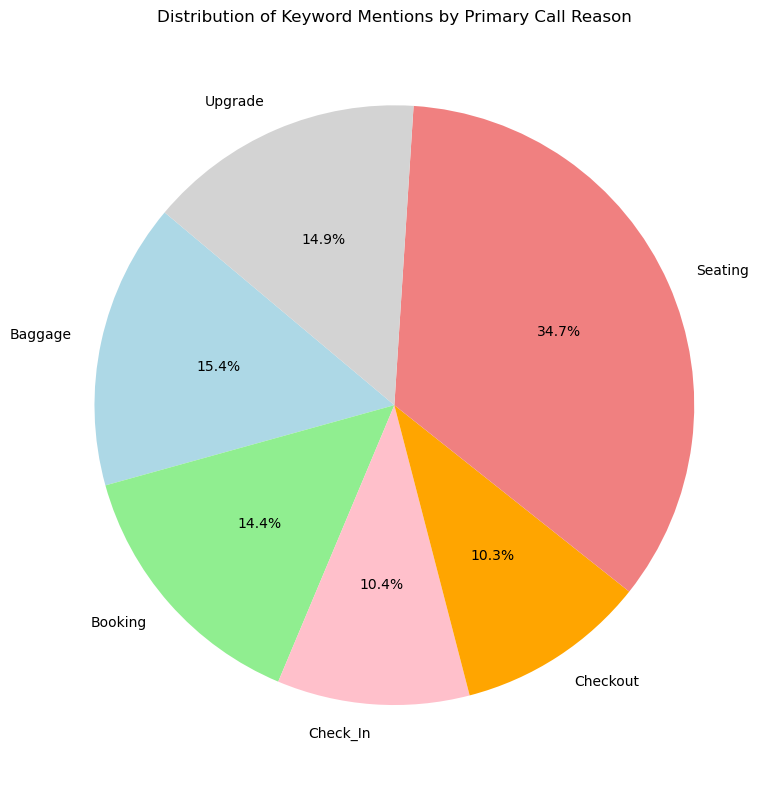

In [53]:

plt.figure(figsize=(8, 8))
plt.pie(keyword_analysis['keyword_mention_count'], labels=keyword_analysis['primary_call_reason'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'pink', 'orange', 'lightcoral', 'lightgrey'])
plt.title('Distribution of Keyword Mentions by Primary Call Reason')
plt.tight_layout()
plt.show()


### Heatmap: Impact of IVR Automation on Agent Workload

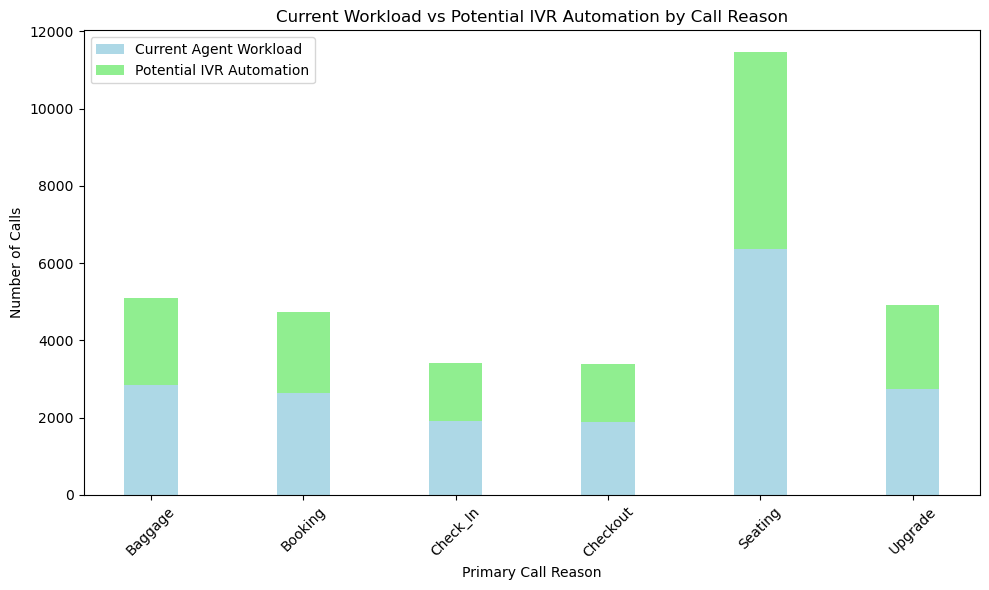

In [56]:

current_workload = keyword_analysis['keyword_mention_count']
potential_automation = [int(count * 0.8) for count in current_workload]  # Assume 80% could be automated
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(keyword_analysis['primary_call_reason']))
ax.bar(index, current_workload, bar_width, label='Current Agent Workload', color='lightblue')
ax.bar(index, potential_automation, bar_width, label='Potential IVR Automation', bottom=current_workload, color='lightgreen')
ax.set_xlabel('Primary Call Reason')
ax.set_ylabel('Number of Calls')
ax.set_title('Current Workload vs Potential IVR Automation by Call Reason')
ax.set_xticks(index)
ax.set_xticklabels(keyword_analysis['primary_call_reason'], rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


### 3. Analyze how elite level impacts call duration

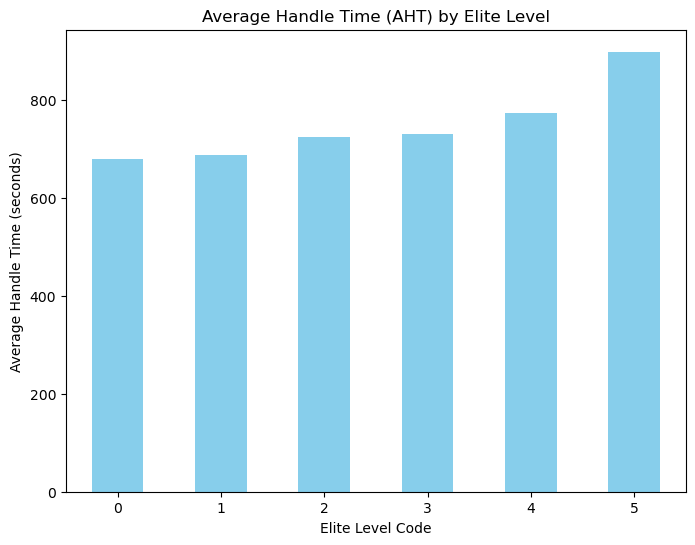

In [84]:

sentiment_merged_data = pd.merge(merged_data, cleaned_sentiment[['call_id', 'customer_tone', 'agent_tone', 'average_sentiment', 'silence_percent_average']], on='call_id', how='left')
elite_analysis = sentiment_merged_data.groupby('elite_level_code')['handle_time_seconds'].mean()

elite_analysis.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Handle Time (AHT) by Elite Level')
plt.xlabel('Elite Level Code')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=0)
plt.show()


### 4. Analyze how elite level impacts customer tone using the new DataFrame

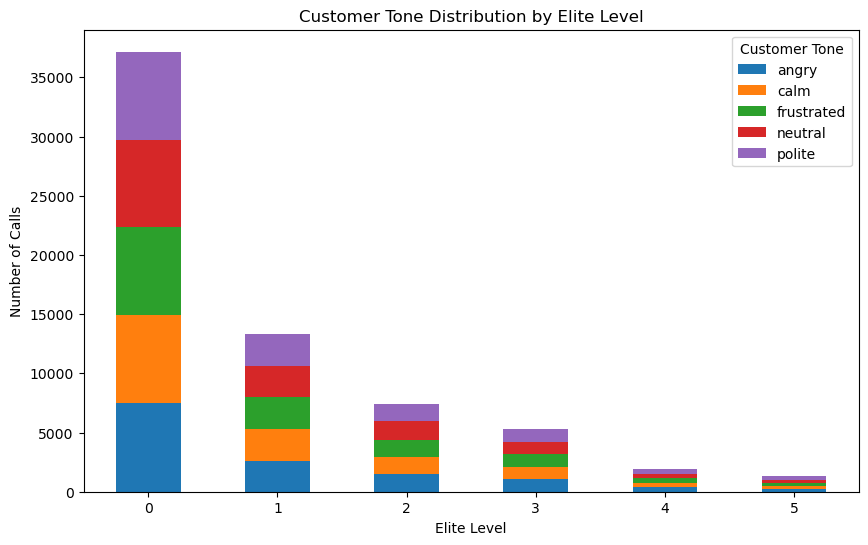

In [86]:
tone_analysis = sentiment_merged_data.groupby('elite_level_code')['customer_tone'].value_counts().unstack().fillna(0)
tone_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Customer Tone Distribution by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Number of Calls')
plt.legend(title='Customer Tone')
plt.xticks(rotation=0)
plt.show()


## Covering 3rd Deliverables

### Pridication of Primary Call Reason 